<a href="https://colab.research.google.com/github/mayait/ClaseAnalisisDatos/blob/main/Pandas_Practice_Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#@title Nombre del estudiante
Estudiante = "" #@param {type:"string"}
Código = "" #@param {type:"string"}

In [53]:
import sys
import numpy as np
import pandas as pd
# Librería para medidas de posición y forma
import scipy
import scipy.stats as stats
# Librerías para visualización
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

import missingno as msno
plt.figure(figsize=(15,8))

## Importa SalaryData

In [54]:
df = pd.read_excel('salary_data_fixed.xlsx', sheet_name='Sheet1')

In [55]:
# El siguiente codigo renombra todas las columnas a minusculas para la paz mental
df.rename(str.lower, axis='columns', inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167278 entries, 0 to 167277
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   case_number                     167278 non-null  object 
 1   case_status                     167278 non-null  object 
 2   case_received_date              167278 non-null  object 
 3   decision_date                   167278 non-null  object 
 4   employer_name                   167278 non-null  object 
 5   prevailing_wage_submitted       167278 non-null  float64
 6   prevailing_wage_submitted_unit  167278 non-null  object 
 7   paid_wage_submitted             167278 non-null  float64
 8   paid_wage_submitted_unit        167278 non-null  object 
 9   job_title                       167278 non-null  object 
 10  work_city                       167275 non-null  object 
 11  education_level_required        11093 non-null   object 
 12  college_major_re

In [57]:
# Si ya tienes una columna de indice puedes establecerla
df.set_index('order')

,case_number,case_status,case_received_date,decision_date,employer_name,prevailing_wage_submitted,prevailing_wage_submitted_unit,paid_wage_submitted,paid_wage_submitted_unit,job_title,...,country_of_citizenship,prevailing_wage_soc_code,prevailing_wage_soc_title,work_state,work_postal_code,full_time_position_y_n,visa_class,prevailing_wage_per_year,paid_wage_per_year,job_title_subgroup
order,,,,,,,,,,,,,,,,,,,,,
1,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.00,year,62171.00,year,SOFTWARE ENGINEER,...,NaN,15-1132,"Software Developers, Applications",IL,NaN,y,H-1B,NaN,62171.0,software engineer
2,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.00,year,91440.00,year,Assistant Professor of Marketing,...,IRAN,25-1011,"Business Teachers, Postsecondary",CALIFORNIA,94132.0,NaN,greencard,NaN,91440.0,assistant professor
3,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.00,year,49470.00,year,SPECIAL EDUCATION TEACHER,...,NaN,25-2052,"Special Education Teachers, Kindergarten and E...",CA,NaN,y,H-1B,NaN,49470.0,teacher
4,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.00,month,43800.00,year,SCIENCE TEACHER,...,NaN,25-1042,"Biological Science Teachers, Postsecondary",TX,NaN,y,H-1B,NaN,43800.0,teacher
5,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.00,bi-weekly,170000.00,year,SENIOR SOFTWARE ENGINEER,...,NaN,15-1133,"Software Developers, Systems Software",OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167357,I-200-12241-209885,certified-withdrawn,8/28/2012,6/6/2013,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",5.05,hour,5.60,hour,MIDDLE SCHOOL TEACHERS,...,NaN,25-2022,"Middle School Teachers, Except Special and Car...",MP,NaN,y,H-1B,10504.0,11648.0,teacher
167358,I-200-11305-143547,denied,11/1/2011,11/3/2011,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",5.05,hour,5.25,hour,PRESCHOOL TEACHER,...,NaN,25-2011,"Preschool Teachers, Except Special Education",MP,NaN,y,H-1B,10504.0,10920.0,teacher
167359,I-200-11313-833007,certified,11/9/2011,11/16/2011,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",5.05,hour,5.25,hour,TEACHER,...,NaN,25-3999,"Teachers and Instructors, All Other*",MP,NaN,y,H-1B,10504.0,10920.0,teacher


In [58]:
print(df.dtypes)

case_number                        object
case_status                        object
case_received_date                 object
decision_date                      object
employer_name                      object
prevailing_wage_submitted         float64
prevailing_wage_submitted_unit     object
paid_wage_submitted               float64
paid_wage_submitted_unit           object
job_title                          object
work_city                          object
education_level_required           object
college_major_required             object
experience_required_y_n            object
experience_required_num_months    float64
country_of_citizenship             object
prevailing_wage_soc_code           object
prevailing_wage_soc_title          object
work_state                         object
work_postal_code                   object
full_time_position_y_n             object
visa_class                         object
prevailing_wage_per_year          float64
paid_wage_per_year                

### 🌶 Convierte DECISION_DATE a formato fecha

### Explora si hay registros vacios:
¿Que variables tienen sub registro?

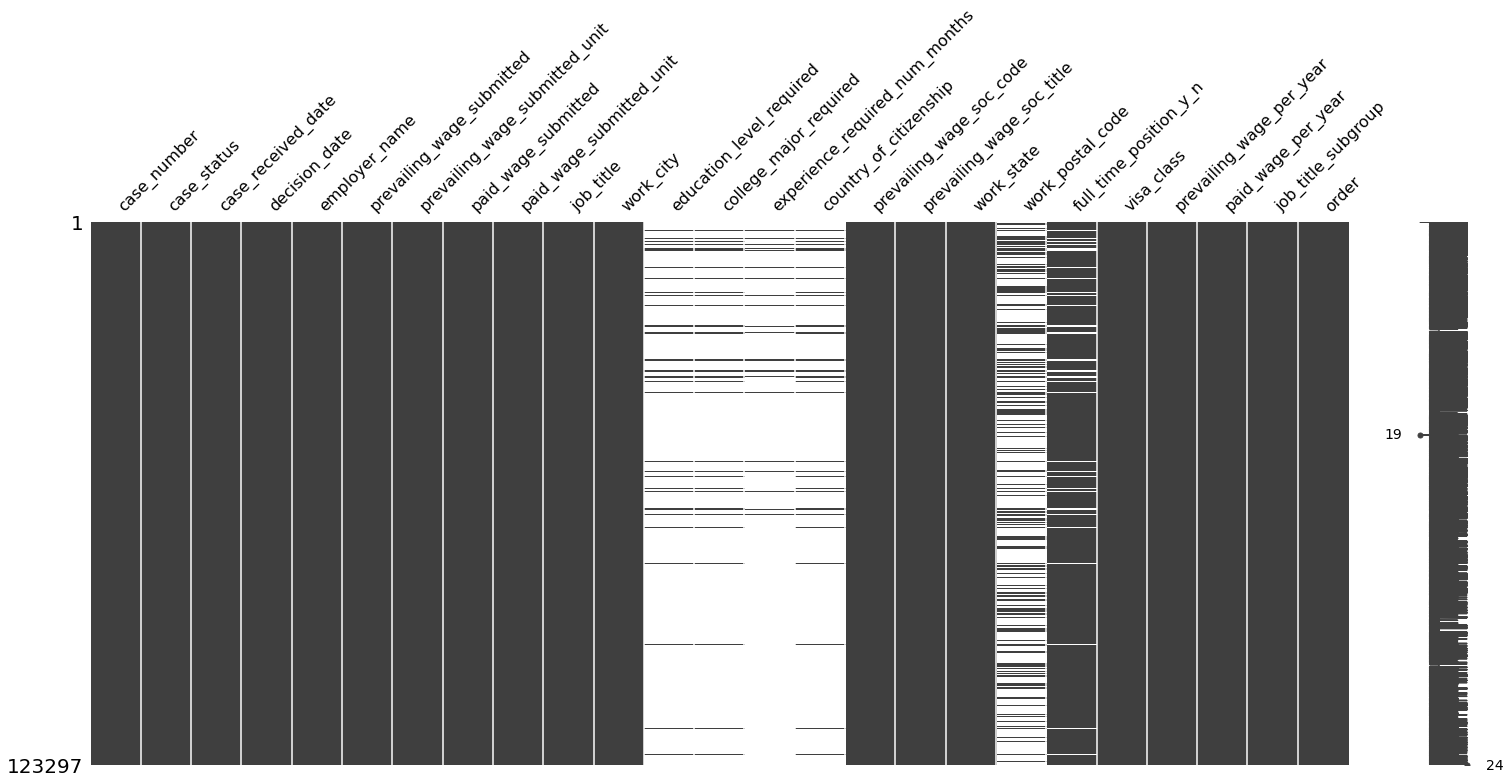

In [133]:
msno.matrix(df)

## Puedes eliminar columnas con df.drop()

In [60]:
df.drop('experience_required_y_n', axis=1, inplace=True)

## ¿Cual es mi primera variable dependiente?

In [61]:
df['paid_wage_per_year'].describe()

count    1.672780e+05
mean     8.553277e+04
std      3.873847e+04
min      1.050000e+04
25%      6.300000e+04
50%      7.860000e+04
75%      1.000060e+05
max      2.500000e+06
Name: paid_wage_per_year, dtype: float64

### Podemos mejorar las unidades del sueldo anual y convertirla a miles de dólares 

In [62]:
# Ten cuidado de no ejecutar esta celda varias veces o seguiras dividendo el valor por mil
df['paid_wage_per_year'] = df['paid_wage_per_year'] / 1000

In [76]:
df['paid_wage_per_year'].describe()

count    167278.000000
mean         85.532766
std          38.738467
min          10.500000
25%          63.000000
50%          78.600000
75%         100.006000
max        2500.000000
Name: paid_wage_per_year, dtype: float64

### ¿Que forma tiene esta distribución?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


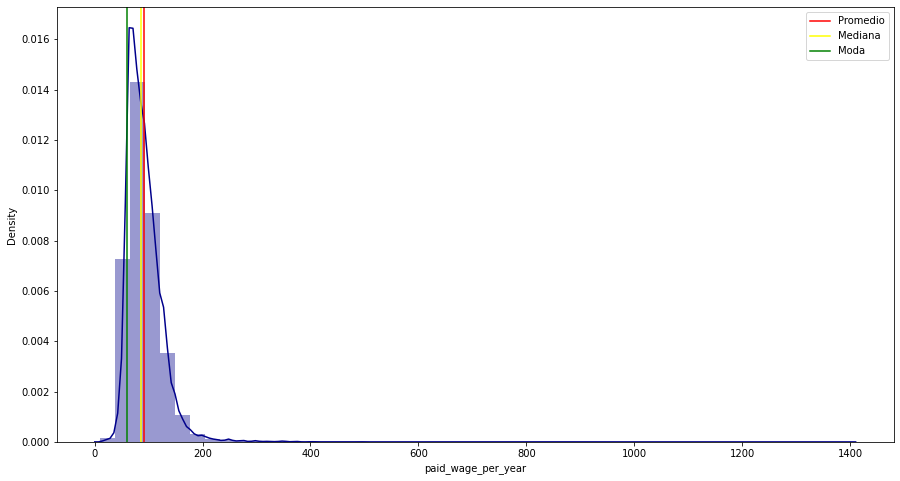

In [135]:
plt.figure(figsize=(15,8))

sns.distplot(df['paid_wage_per_year'], color ="darkblue", kde=True)
plt.axvline(df['paid_wage_per_year'].mean(), color='red', label='Promedio')
plt.axvline(df['paid_wage_per_year'].median(), color='yellow', label='Mediana')
plt.axvline(df['paid_wage_per_year'].mode()[0], color='green', label='Moda')
plt.legend()
plt.show()

## Visualiza un boxplot de *paid_wage_per_year*

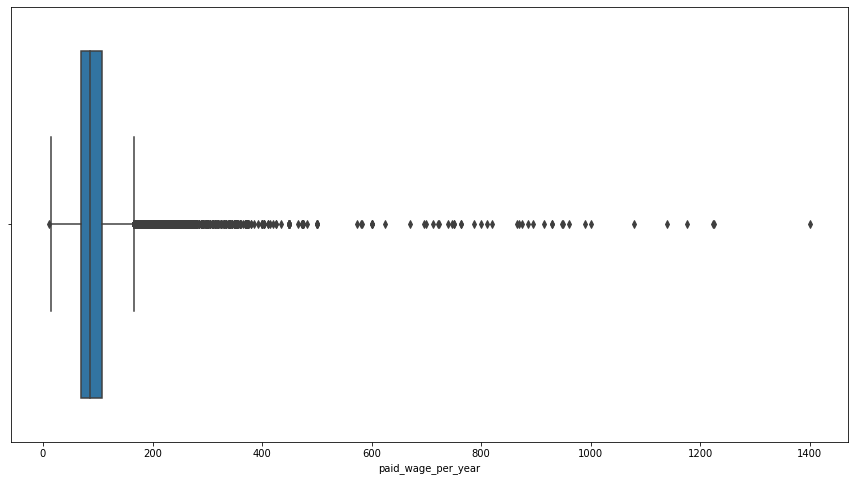

In [136]:
plt.figure(figsize=(15,8))

sns.boxplot(x=df["paid_wage_per_year"])

## Compara los boxplots para cada job_title_subgroup

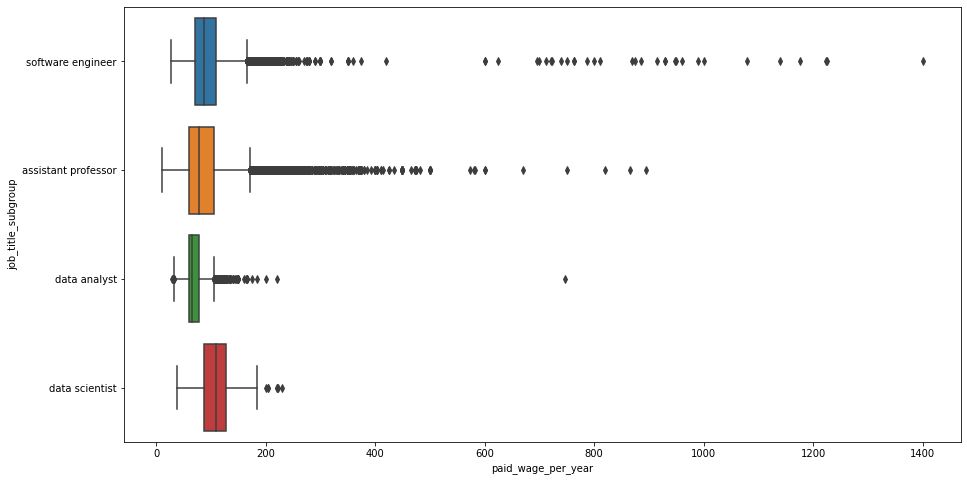

In [137]:
plt.figure(figsize=(15,8))

sns.boxplot(x=df["paid_wage_per_year"], y=df["job_title_subgroup"])

## Quita las profesiones que no aportan al estudio, quedate con 4 categorias

In [105]:
# Estamos buscando todas las filas que son diferentes a abogado
df = df[ df["job_title_subgroup"] != 'attorney']

# Estamos buscando todas las filas que son diferentes a management consultant
df = df[ df["job_title_subgroup"] != 'management consultant']

# Estamos buscando todas las filas que son diferentes a business analyst
df = df[ df["job_title_subgroup"] != 'business analyst']

# Estamos buscando todas las filas que son diferentes a business analyst
df = df[ df["job_title_subgroup"] != 'teacher']

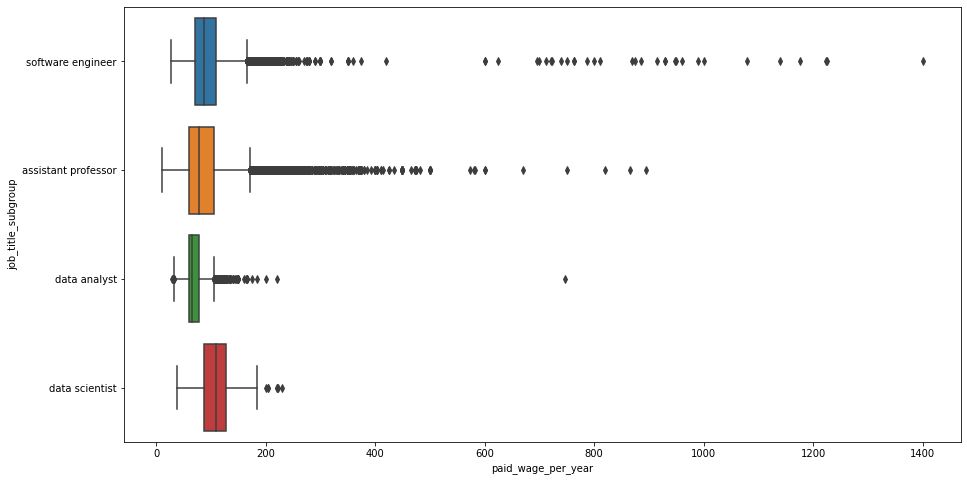

In [138]:
plt.figure(figsize=(15,8))

sns.boxplot(x=df["paid_wage_per_year"], y=df["job_title_subgroup"])

# 🌶 Identifica los limites para los valores extremos con la formula del IQR

In [79]:
limit_sup = 155 # Cambialo por la formula
limit_inf = 44 # Cambialo por la formula

print("El límite inferior para valores extremos es:", (limit_inf))
print("El límite superior para valores extremos es:", (limit_sup))

El límite inferior para valores extremos es: 44
El límite superior para valores extremos es: 155


## Investiga que hay en los outliers superiores
¿Quien gana tanto?

In [107]:
df_outliers = df[df['paid_wage_per_year'] > limit_sup].copy()

In [108]:
df_outliers.shape

(4184, 25)

In [142]:
df_outliers['job_title_subgroup'].value_counts()

assistant professor    2256
software engineer      1864
data scientist           54
data analyst             10
Name: job_title_subgroup, dtype: int64

### Ordena por los que más ganan y explora

In [143]:
df_outliers.sort_values(by='paid_wage_per_year', ascending=False).head(10)

,case_number,case_status,case_received_date,decision_date,employer_name,prevailing_wage_submitted,prevailing_wage_submitted_unit,paid_wage_submitted,paid_wage_submitted_unit,job_title,...,prevailing_wage_soc_code,prevailing_wage_soc_title,work_state,work_postal_code,full_time_position_y_n,visa_class,prevailing_wage_per_year,paid_wage_per_year,job_title_subgroup,order
23290,I-200-12311-962776,certified,11/7/2012,11/15/2012,"KPI PARTNERS, INC.",101462.0,year,1400000.0,year,SENIOR SOFTWARE ENGINEER,...,15-1132,"Software Developers, Applications",AL,NaN,y,H-1B,101462.0,1400.0000,software engineer,23352
63737,I-200-14156-834602,certified,6/9/2014,6/17/2014,"ABACUS TECHNICAL SERVICES, LLC",78915.0,year,1224800.6,year,NETWORK SOFTWARE ENGINEER IV,...,15-1133,"Software Developers, Systems Software",TX,NaN,y,H-1B,78915.0,1224.8006,software engineer,63820
22930,I-200-14129-716884,withdrawn,5/9/2014,5/13/2014,"INSIDE, INC.",101899.0,year,101899.0,month,SOFTWARE ENGINEER,...,15-1132,"Software Developers, Applications",WA,NaN,y,H-1B,101899.0,1222.7880,software engineer,22992
34767,I-200-13065-717171,certified-withdrawn,3/6/2013,3/21/2013,ROVI CORPORATION,94370.0,year,98000.0,month,SENIOR SOFTWARE ENGINEER,...,15-1132,"Software Developers, Applications",PA,NaN,y,H-1B,94370.0,1176.0000,software engineer,34833
80499,I-200-14034-213977,withdrawn,3/4/2014,3/6/2014,GOOGLE INC.,71822.0,year,1139001.0,year,SOFTWARE ENGINEER,...,15-1132,"Software Developers, Applications",PA,NaN,y,H-1B,71822.0,1139.0010,software engineer,80583
75727,I-200-14363-587509,withdrawn,1/9/2015,1/29/2015,"PROFICIENT BUSINESS SYSTEMS, INC.",73445.0,year,90000.0,month,SOFTWARE ENGINEER,...,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",GA,30338,y,H-1B,73445.0,1080.0000,software engineer,75811
32986,I-200-13210-327581,withdrawn,7/29/2013,8/1/2013,"LANDIS GYR TECHNOLOGY, INC",95971.0,year,1000906.0,year,SENIOR SOFTWARE ENGINEER,...,15-1133,"Software Developers, Systems Software",MN,NaN,y,H-1B,95971.0,1000.9060,software engineer,33052
52083,I-200-13142-808848,withdrawn,5/22/2013,5/24/2013,TIVO INC.,84802.0,year,990000.0,year,SENIOR SOFTWARE ENGINEER,...,15-1132,"Software Developers, Applications",CA,NaN,y,H-1B,84802.0,990.0000,software engineer,52166
51032,I-200-13106-409972,certified,4/16/2013,4/22/2013,"ALIASWIRE, INC.",85446.0,year,960000.0,year,SOFTWARE ENGINEER,...,15-1034,"Computer Software Engineers, Applications, Non...",MA,NaN,y,H-1B,85446.0,960.0000,software engineer,51115
47372,I-200-15042-842852,withdrawn,2/11/2015,2/16/2015,"DIYOTTA, INC.",88067.0,year,950000.0,year,SR. SOFTWARE ENGINEER,...,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",NC,28273,y,H-1B,88067.0,950.0000,software engineer,47454


## Creamos un dataframe nuevo con los datos entre los dos limites:



In [144]:
df_clean = df[(df['paid_wage_per_year'] > limit_inf) & (df['paid_wage_per_year'] < limit_sup)]

In [145]:
# Tambien puedes usar between
# https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html

df_clean = df[ df['paid_wage_per_year'].between(limit_inf, limit_sup) ]

In [146]:
df_clean.shape

(118197, 25)

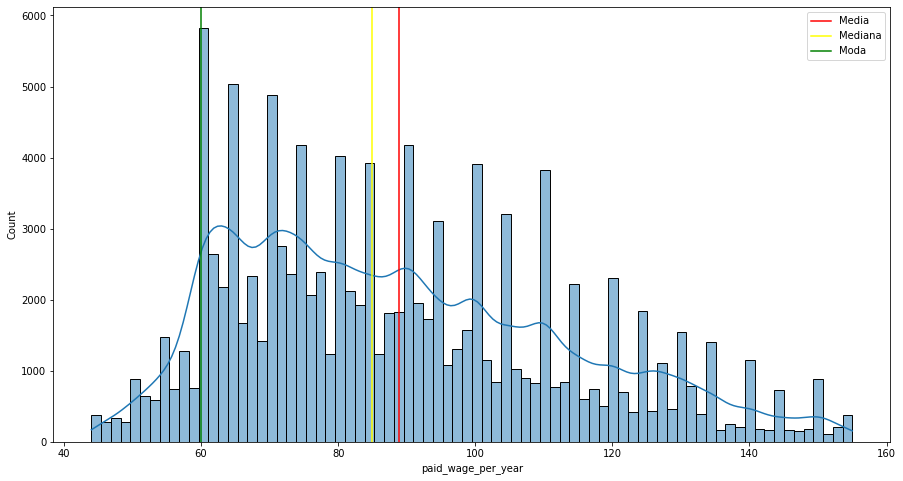

In [154]:
plt.figure(figsize=(15,8))

sns.histplot(df_clean['paid_wage_per_year'],kde=True)

plt.axvline(df_clean['paid_wage_per_year'].mean(), color='red', label='Media')
plt.axvline(df_clean['paid_wage_per_year'].median(), color='yellow', label='Mediana')
plt.axvline(df_clean['paid_wage_per_year'].mode()[0], color='green', label='Moda')
plt.legend()
plt.show()

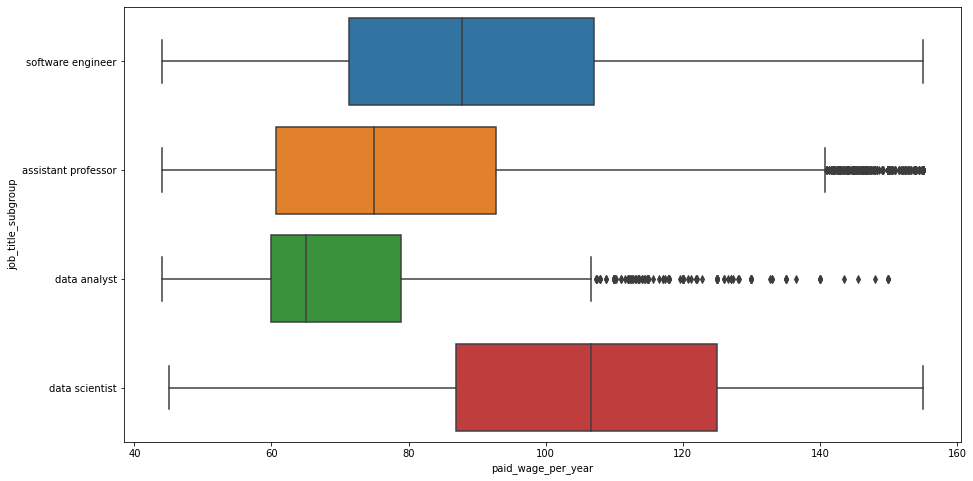

In [155]:
plt.figure(figsize=(15,8))

sns.boxplot(
    x = df_clean["paid_wage_per_year"], 
    y = df_clean["job_title_subgroup"]
    )

In [159]:
df_clean.groupby(by = 'job_title_subgroup')['paid_wage_per_year'].agg(['max', 'min','mean','median','count']).round(0)

,max,min,mean,median,count
job_title_subgroup,,,,,
assistant professor,155.0,44.0,80.0,75.0,15874
data analyst,150.0,44.0,70.0,65.0,3737
data scientist,155.0,45.0,105.0,107.0,1171
software engineer,155.0,44.0,91.0,88.0,97415


## Identifica los top 10 empleadores y filtra todos los registros de estos empleadores.
¿Qué empresas tienen los salarios más altos para esos subtipos?

In [193]:
top_10_employeer = df['employer_name'].value_counts().head(10).index

In [194]:
df_top_employeer = df[ df.employer_name.isin(top_10_employeer) ]

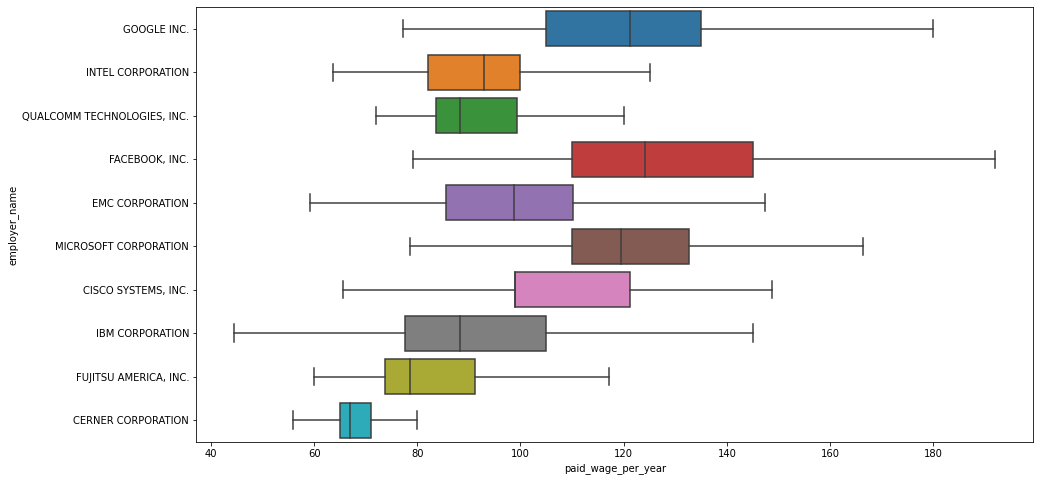

In [195]:
plt.figure(figsize=(15,8))

sns.boxplot(
    x = df_top_employeer["paid_wage_per_year"], 
    y = df_top_employeer["employer_name"],
    showfliers = False
    )

In [204]:
df['work_state'].value_counts().head(10)

california    41031
tx             8825
ny             6484
nj             5102
il             4953
ma             4902
ga             3817
wa             3769
va             3634
pa             3350
Name: work_state, dtype: int64

In [198]:
df['work_state'] = df['work_state'].str.lower() # Lowerize the whole thing
df.work_state

0                 il
1         california
4                 or
6                 ca
7                 nj
             ...    
167240            wv
167241            wv
167242            wv
167243            wv
167244            wi
Name: work_state, Length: 123297, dtype: object

In [211]:
states_for_clean = [
    ["al","alabama"],
    ["ak","alaska"],
    ["az","arizona"],
    ["ar","arkansas"],
    ["ca","california"],
    ["co","colorado"],
    ["ct","connecticut"],
    ["de","delaware"],
    ["fl","florida"],
    ["ga","georgia"],
    ["hi","hawaii"],
    ["id","idaho"],
    ["il","illinois"],
    ["in","indiana"],
    ["ia","iowa"],
    ["ks","kansas"],
    ["ky","kentucky"],
    ["la","louisiana"],
    ["me","maine"],
    ["md","maryland"],
    ["ma","massachusetts"],
    ["mi","michigan"],
    ["mn","minnesota"],
    ["ms","mississippi"],
    ["mo","missouri"],
    ["mt","montana"],
    ["ne","nebraska"],
    ["nv","nevada"],
    ["nh","new hampshire"],
    ["nj","new jersey"],
    ["nm","new mexico"],
    ["ny","new york"],
    ["nc","north carolina"],
    ["nd","north dakota"],
    ["oh","ohio"],
    ["ok","oklahoma"],
    ["or","oregon"],
    ["pa","pennsylvania"],
    ["ri","rhode island"],
    ["sc","south carolina"],
    ["sd","south dakota"],
    ["tn","tennessee"],
    ["tx","texas"],
    ["ut","utah"],
    ["vt","vermont"],
    ["va","virginia"],
    ["wa","washington"],
    ["wv","west virginia"],
    ["wi","wisconsin"],
    ["wy","wyoming"],

]

In [220]:
df['work_state_clean'] = df['work_state'].copy()
for state in states_for_clean:
  df['work_state_clean'] = df['work_state_clean'].replace( state[0], state[1])



In [233]:
  df['work_state_clean'].value_counts(abs).head(10)

california       0.332782
texas            0.075971
new york         0.055711
new jersey       0.047925
massachusetts    0.043042
illinois         0.042718
georgia          0.032515
washington       0.032515
virginia         0.031598
pennsylvania     0.029530
Name: work_state_clean, dtype: float64

## Convertir decision_date a formato de fecha

In [236]:
df['decision_date'] = pd.to_datetime(df['decision_date'], format = '%m/%d/%Y')

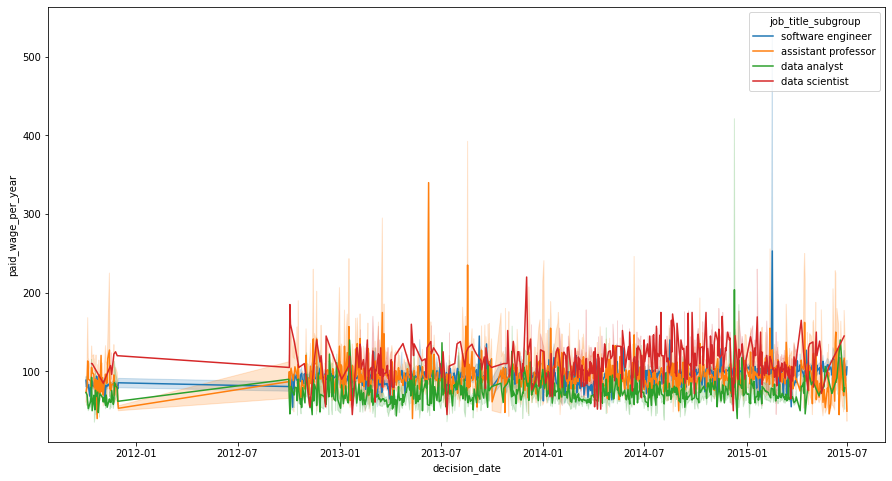

In [254]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x="decision_date", y="paid_wage_per_year", hue="job_title_subgroup")